In [231]:
import pandas as pd
import numpy as np

#Прочитаем датасет с данными о клиентах
data_client = pd.read_csv('data_credit_card/application_record.csv')
data_client.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [232]:
#Прочитаем датасет с данными о записях 
data_record = pd.read_csv('data_credit_card/credit_record.csv')
data_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


## Знакомимся с данными

In [233]:
## Посмотрим какие типы данных нам представлены
data_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [234]:
data_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


Как видим по большей части у нас имеются числовые признаки, даты обозначены так же в виде чисел. В последующем их можно будет перевести.



In [235]:
#Проверим данные на пропуски
data_client.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

В данных о роде занятости имеются 134203 пропуска, т.к. заполнять модальными либо медианными значениями бессмысленно, то в будущем удалим эти пропуски.

In [236]:
#Посмотрим на показатели
data_client.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [237]:
data_record.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [238]:
data_client.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

Видим, что уникальных ID у нас имеется всего 438510, т.е. 47 значенией у нас дублируют данные, позднее это может повлиять на модель, так что удалим данные в следующем пункте.

## Предобработка и очистка данных

In [239]:
#Удалим дубликаты
data_client = data_client.drop_duplicates(subset='ID', keep=False)
data_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438463 non-null  int64  
 1   CODE_GENDER          438463 non-null  object 
 2   FLAG_OWN_CAR         438463 non-null  object 
 3   FLAG_OWN_REALTY      438463 non-null  object 
 4   CNT_CHILDREN         438463 non-null  int64  
 5   AMT_INCOME_TOTAL     438463 non-null  float64
 6   NAME_INCOME_TYPE     438463 non-null  object 
 7   NAME_EDUCATION_TYPE  438463 non-null  object 
 8   NAME_FAMILY_STATUS   438463 non-null  object 
 9   NAME_HOUSING_TYPE    438463 non-null  object 
 10  DAYS_BIRTH           438463 non-null  int64  
 11  DAYS_EMPLOYED        438463 non-null  int64  
 12  FLAG_MOBIL           438463 non-null  int64  
 13  FLAG_WORK_PHONE      438463 non-null  int64  
 14  FLAG_PHONE           438463 non-null  int64  
 15  FLAG_EMAIL       

In [240]:
#Теперь удалим пропущенные значения
data_client = data_client.dropna()
data_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304286 entries, 2 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   304286 non-null  int64  
 1   CODE_GENDER          304286 non-null  object 
 2   FLAG_OWN_CAR         304286 non-null  object 
 3   FLAG_OWN_REALTY      304286 non-null  object 
 4   CNT_CHILDREN         304286 non-null  int64  
 5   AMT_INCOME_TOTAL     304286 non-null  float64
 6   NAME_INCOME_TYPE     304286 non-null  object 
 7   NAME_EDUCATION_TYPE  304286 non-null  object 
 8   NAME_FAMILY_STATUS   304286 non-null  object 
 9   NAME_HOUSING_TYPE    304286 non-null  object 
 10  DAYS_BIRTH           304286 non-null  int64  
 11  DAYS_EMPLOYED        304286 non-null  int64  
 12  FLAG_MOBIL           304286 non-null  int64  
 13  FLAG_WORK_PHONE      304286 non-null  int64  
 14  FLAG_PHONE           304286 non-null  int64  
 15  FLAG_EMAIL       

In [241]:
# Для удобства переименуем столбцы 
data_client.rename(columns={'CODE_GENDER':'Gender','FLAG_OWN_CAR':'Car','FLAG_OWN_REALTY':'Reality',
                         'CNT_CHILDREN':'ChldNo','AMT_INCOME_TOTAL':'inc',
                         'NAME_EDUCATION_TYPE':'edutp','NAME_FAMILY_STATUS':'famtp',
                        'NAME_HOUSING_TYPE':'houtp','DAYS_BIRTH':'birth','DAYS_EMPLOYED':'exp_work','FLAG_MOBIL':'mobil','FLAG_EMAIL':'email',
                         'NAME_INCOME_TYPE':'inctp','FLAG_WORK_PHONE':'wkphone',
                         'FLAG_PHONE':'phone','CNT_FAM_MEMBERS':'famsize','OCCUPATION_TYPE':'occupation'
                        },inplace=True)
data_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304286 entries, 2 to 438556
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          304286 non-null  int64  
 1   Gender      304286 non-null  object 
 2   Car         304286 non-null  object 
 3   Reality     304286 non-null  object 
 4   ChldNo      304286 non-null  int64  
 5   inc         304286 non-null  float64
 6   inctp       304286 non-null  object 
 7   edutp       304286 non-null  object 
 8   famtp       304286 non-null  object 
 9   houtp       304286 non-null  object 
 10  birth       304286 non-null  int64  
 11  exp_work    304286 non-null  int64  
 12  mobil       304286 non-null  int64  
 13  wkphone     304286 non-null  int64  
 14  phone       304286 non-null  int64  
 15  email       304286 non-null  int64  
 16  occupation  304286 non-null  object 
 17  famsize     304286 non-null  float64
dtypes: float64(2), int64(8), object(8)
memory us

In [242]:
#Переведём бинарные данные в значения 0 и 1
data_client['Gender'].replace('M',0,inplace=True)
data_client['Gender'].replace('F',1,inplace=True)
data_client['Car'].replace('Y',0,inplace=True)
data_client['Car'].replace('N',1,inplace=True)
data_client['Reality'].replace('Y',0,inplace=True)
data_client['Reality'].replace('N',1,inplace=True)

In [243]:
data_client.head()

,ID,Gender,Car,Reality,ChldNo,inc,inctp,edutp,famtp,houtp,birth,exp_work,mobil,wkphone,phone,email,occupation,famsize
2,5008806,0,0,0,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [244]:
data_client['houtp'].value_counts()


House / apartment      269957
With parents            15637
Municipal apartment      9661
Rented apartment         4818
Office apartment         3005
Co-op apartment          1208
Name: houtp, dtype: int64

In [245]:
#Переведём данные о возрасте в более понятный формат, напишем для этого функцию и применим её на наших данных.
from datetime import date,timedelta

def day_birth(day_num):
    today = date.today() 
    birthday = (today + timedelta(days=day_num)).strftime('%Y-%m-%d')
    return birthday

data_client['Age'] = data_client['birth'].apply(day_birth)
data_client['Age']=-(data_client['birth'])//365

<AxesSubplot: ylabel='Frequency'>

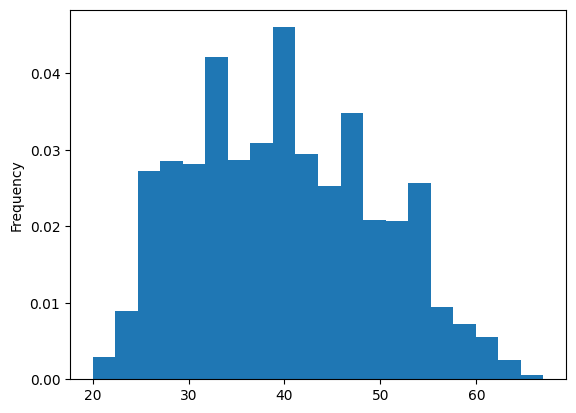

In [246]:
#Построим визуализацию возраста клиента
data_client['Age'].plot(kind='hist',bins=20,density=True)


In [247]:
#Поработаем с кредитным рейтингом, определим , каких клиенты у нас будут потенциально одобрены(1), какие уйдут в отказ(0), а какие нейтральны(-1), для этого напишем функцию
def credit_score_status(df):
    if(df['STATUS'] == 'X'): return -1
    elif(df['STATUS'] == '1' or df['STATUS'] == '2' or df['STATUS'] == '3' or df['STATUS'] == '4' or df['STATUS'] == '5'): return 0
    elif(df['STATUS'] == 'C' or df['STATUS'] == '0'): return 1
    
#Применим на наших данных
data_record['Approval'] = data_record.apply(credit_score_status, axis=1)
#Удалим данные о клиентах с отсутствием кредита
data_record = data_record[data_record['Approval']!=-1]
data_record['STATUS'].value_counts()

C    442031
0    383120
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

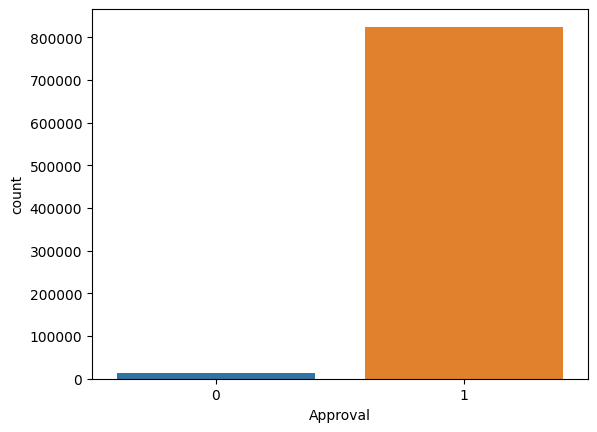

In [248]:
#Построим визуализацию по количеству потенциальных отказов и одобрений
import seaborn as sns
sns.countplot(x=data_record['Approval']);

Как видим подавляющее большинсто клиентов попало в список потенциально одобренных

In [249]:
#объединим таблицы и удалим признак ID
data = data_client.merge(data_record,how='inner',on = 'ID')
data = data.drop(['ID'],axis=1)
data.head()

,Gender,Car,Reality,ChldNo,inc,inctp,edutp,famtp,houtp,birth,...,mobil,wkphone,phone,email,occupation,famsize,Age,MONTHS_BALANCE,STATUS,Approval
0,0,0,0,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,...,1,0,0,0,Security staff,2.0,58,0,C,1
1,0,0,0,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,...,1,0,0,0,Security staff,2.0,58,-1,C,1
2,0,0,0,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,...,1,0,0,0,Security staff,2.0,58,-2,C,1
3,0,0,0,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,...,1,0,0,0,Security staff,2.0,58,-3,C,1
4,0,0,0,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,...,1,0,0,0,Security staff,2.0,58,-4,C,1


C:\Users\Dekstop\AppData\Local\Temp\ipykernel_21788\78532827.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='bwr')


<AxesSubplot: >

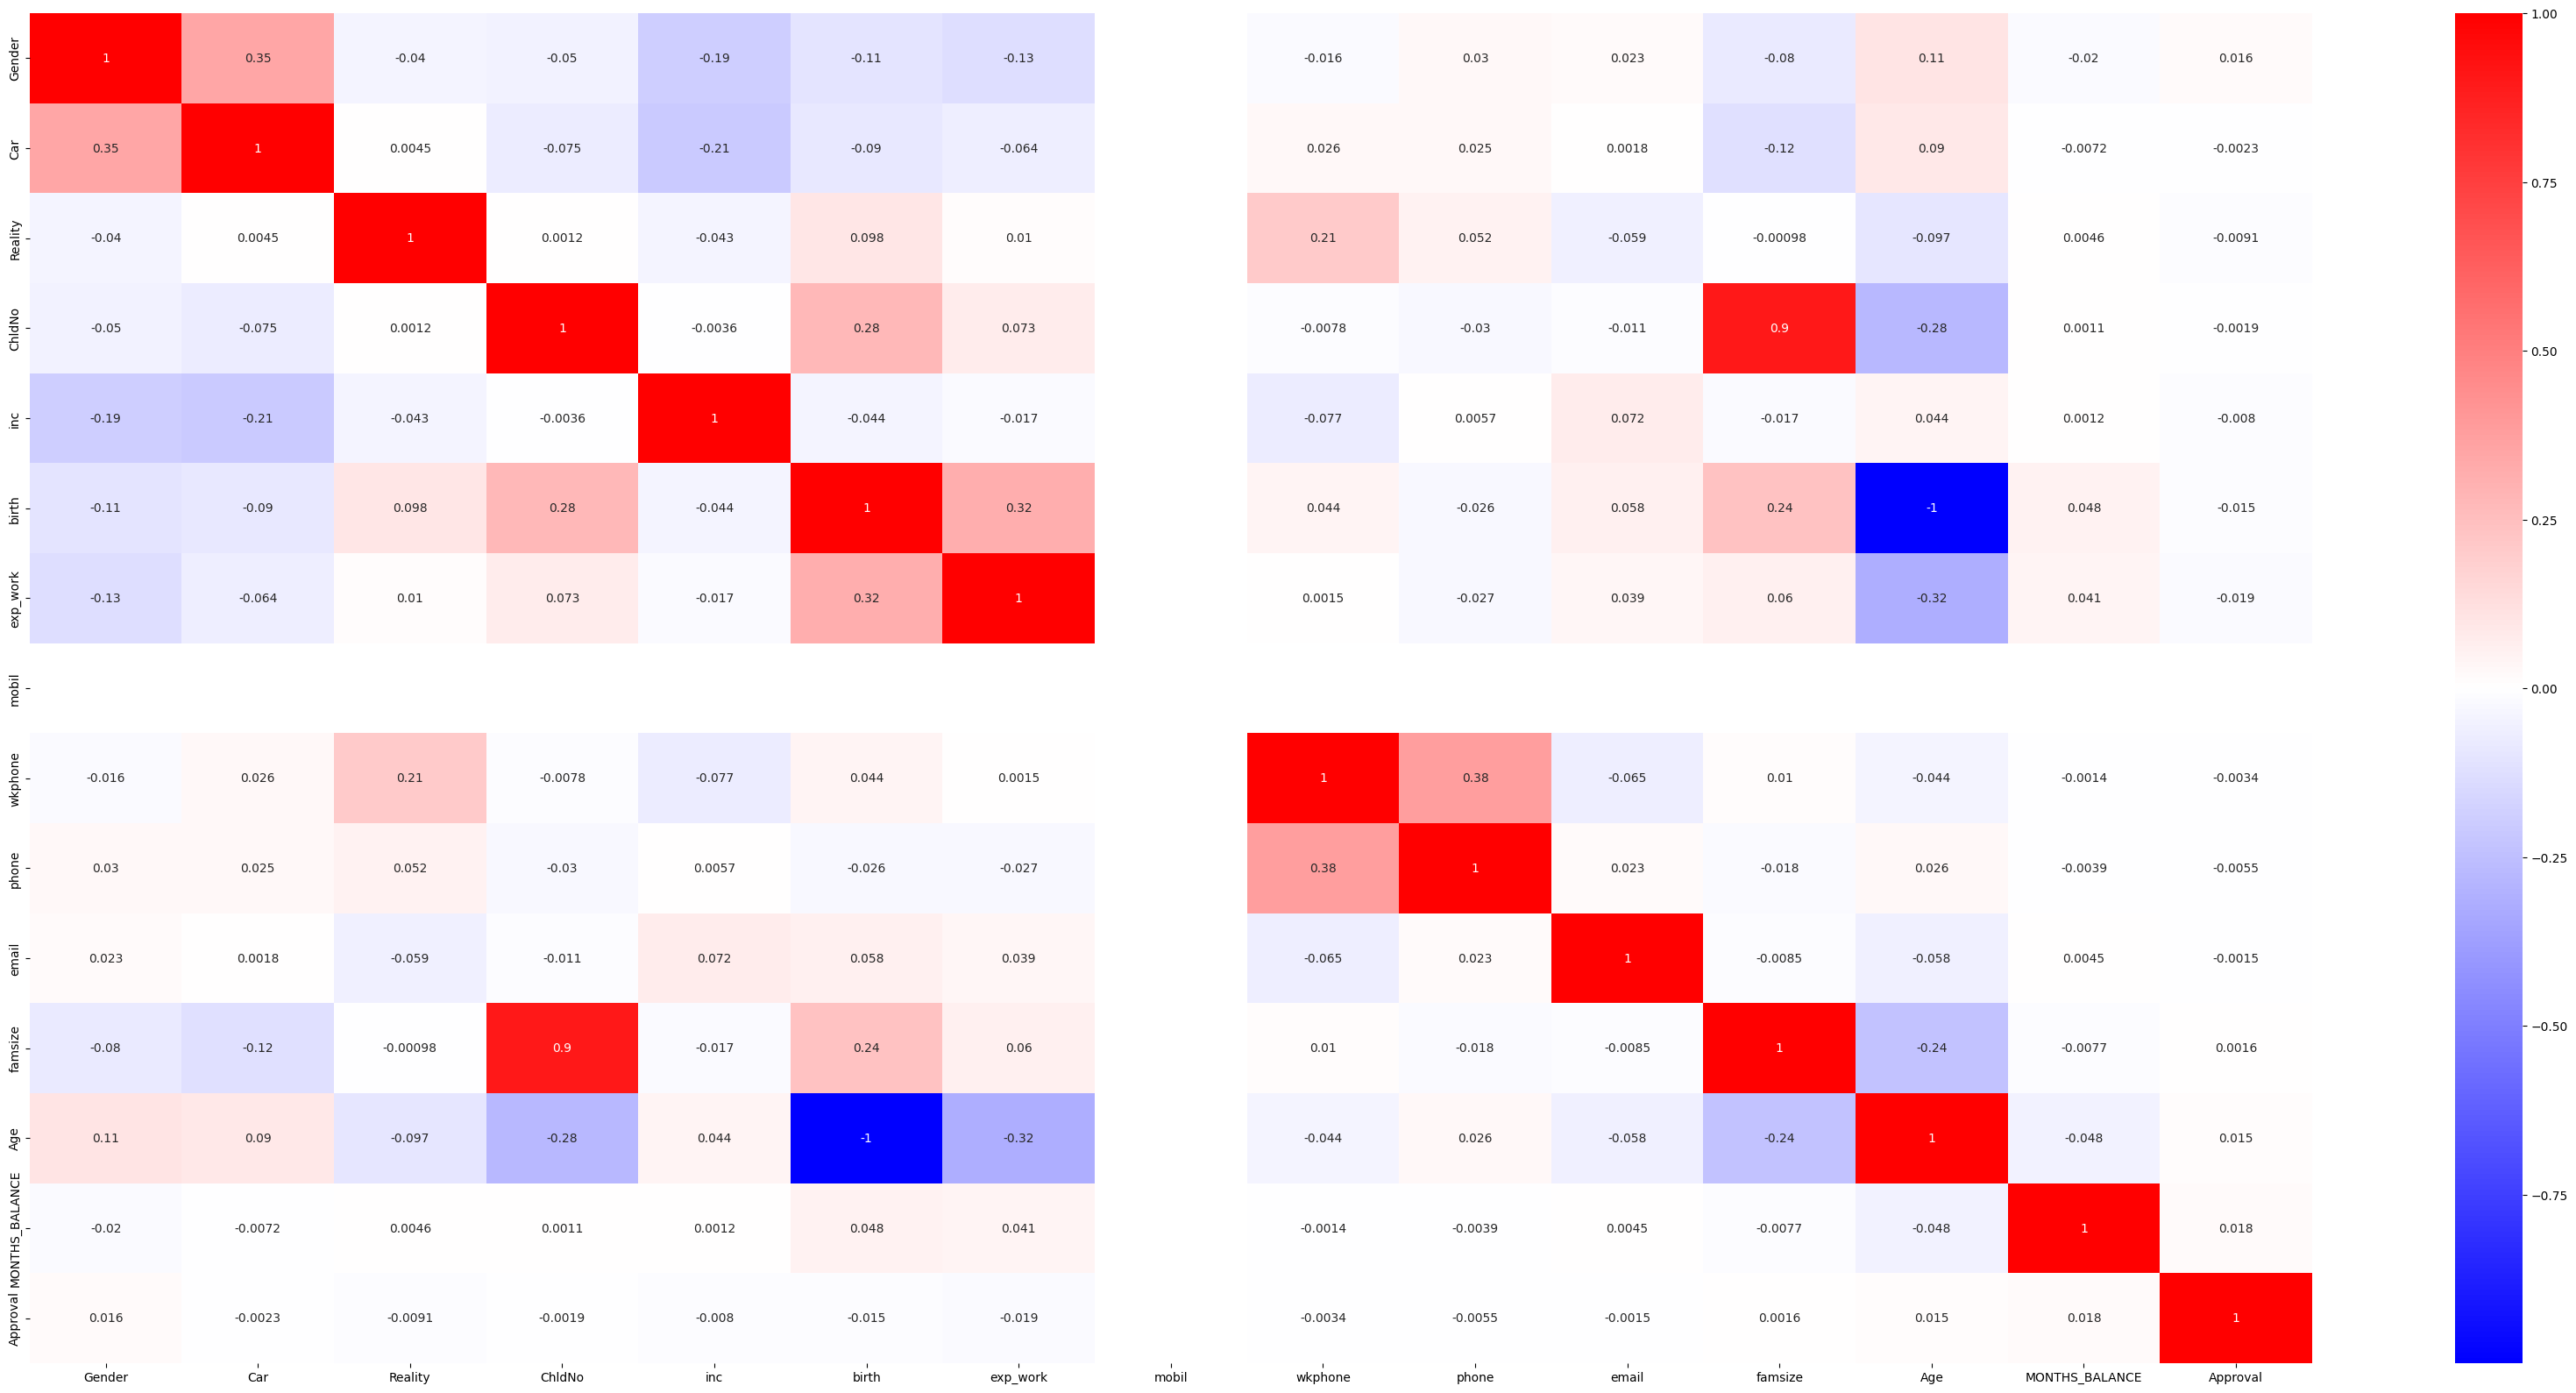

In [250]:
#Построим матрицу корреляций и удалим все ненужные признаки
import matplotlib.pyplot as plt
plt.figure(figsize=(42,20))
sns.heatmap(data.corr(),annot=True,cmap='bwr')




Видим что у нас наличие телефона вызывает определённую ошибку в матрице, удалим его(у всех данный показатель = 1), так же видим что сильно коррелируют между собой Age и birth, т.к. Age мы ранее как раз таки преобразовали в более удобный формат из birth, так же видим что наличие детей сильно коррелирует с количеством членов семьи , удалим показатель наличия детей.

In [251]:
#Удалим столбцы в которых не имеется нобходимости (так же удалим наличие email)
data = data.drop(columns=['mobil','birth','ChldNo'])

In [252]:
#Перед обучением модели необходимо закодировать категориальные признаки, на мой взгляд для этого лучше всего подойдёт OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
data['inctp'] = oe.fit_transform(data[['inctp']])
data['edutp'] = oe.fit_transform(data[['edutp']])
data['famtp'] = oe.fit_transform(data[['famtp']])
data['houtp'] = oe.fit_transform(data[['houtp']])
data['occupation'] = oe.fit_transform(data[['occupation']])
data['STATUS'] = oe.fit_transform(data[['STATUS']])

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435500 entries, 0 to 435499
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Gender          435500 non-null  int64  
 1   Car             435500 non-null  int64  
 2   Reality         435500 non-null  int64  
 3   inc             435500 non-null  float64
 4   inctp           435500 non-null  float64
 5   edutp           435500 non-null  float64
 6   famtp           435500 non-null  float64
 7   houtp           435500 non-null  float64
 8   exp_work        435500 non-null  int64  
 9   wkphone         435500 non-null  int64  
 10  phone           435500 non-null  int64  
 11  email           435500 non-null  int64  
 12  occupation      435500 non-null  float64
 13  famsize         435500 non-null  float64
 14  Age             435500 non-null  int64  
 15  MONTHS_BALANCE  435500 non-null  int64  
 16  STATUS          435500 non-null  float64
 17  Approval  

In [254]:
data.head()

,Gender,Car,Reality,inc,inctp,edutp,famtp,houtp,exp_work,wkphone,phone,email,occupation,famsize,Age,MONTHS_BALANCE,STATUS,Approval
0,0,0,0,112500.0,4.0,4.0,1.0,1.0,-1134,0,0,0,16.0,2.0,58,0,6.0,1
1,0,0,0,112500.0,4.0,4.0,1.0,1.0,-1134,0,0,0,16.0,2.0,58,-1,6.0,1
2,0,0,0,112500.0,4.0,4.0,1.0,1.0,-1134,0,0,0,16.0,2.0,58,-2,6.0,1
3,0,0,0,112500.0,4.0,4.0,1.0,1.0,-1134,0,0,0,16.0,2.0,58,-3,6.0,1
4,0,0,0,112500.0,4.0,4.0,1.0,1.0,-1134,0,0,0,16.0,2.0,58,-4,6.0,1


С данными разобрались, переходим к обучению модели.

## Обучение модели


Целевым признаком будет являться признак одобрения (Approval)

In [255]:
X = data.drop(['Approval'], axis = 1)
y = data['Approval']


In [256]:
#Разделим данные на тренировочную и тестовую выборки
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


Так как перед нами очевидно стоит задача классификации, то будем сравнивать 3 модели:

- Дерево решений
- Случайный лес
- Градиентный бустинг

Метрика по которой будем ориентироваться будет Accuracy.

In [260]:
#Построим модель дерева решений
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
dtc = DecisionTreeClassifier(max_depth=42,
                               min_samples_split=8,
                               random_state=42)
dtc.fit(X_train, y_train)
y_predict = dtc.predict(X_test)

print('Accuracy: {:.3}'.format(accuracy_score(y_test, y_predict)))
print(classification_report(y_test, y_predict))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2543
           1       1.00      1.00      1.00    128107

    accuracy                           1.00    130650
   macro avg       1.00      1.00      1.00    130650
weighted avg       1.00      1.00      1.00    130650



In [261]:
#Построим модель случайного леса
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_test)

print('Accuracy :{:.5}'.format(accuracy_score(y_test, y_predict)))
print(classification_report(y_test, y_predict))

Accuracy :1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2543
           1       1.00      1.00      1.00    128107

    accuracy                           1.00    130650
   macro avg       1.00      1.00      1.00    130650
weighted avg       1.00      1.00      1.00    130650



In [262]:
#Построим модель градиентного бустинга
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=12,
                      n_estimators=250,
                      min_child_weight=8, 
                      subsample=0.8, 
                      learning_rate =0.02,    
                      seed=42)

xgb.fit(X_train, y_train)
y_predict = xgb.predict(X_test)
print('Accuracy: {:.5}'.format(accuracy_score(y_test, y_predict)))
print(classification_report(y_test, y_predict))

Accuracy Score is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2543
           1       1.00      1.00      1.00    128107

    accuracy                           1.00    130650
   macro avg       1.00      1.00      1.00    130650
weighted avg       1.00      1.00      1.00    130650



Как видим каждая из моделей показала наивысший показатель. 